In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = np.loadtxt('HILLS_MULTIWALKER', comments=['@', '#'])
# dump the original data (HILLS_MULTIWALKER) into a single file (HILL_SORTED) with only one column name line
# columns are
#! FIELDS time ex.cb_fict ex.cw_fict sigma_ex.cb_fict sigma_ex.cw_fict height biasf
#! SET multivariate false
# (manually add to the start of the file):
np.savetxt('HILLS_SORTED', data, fmt=['%f', '%f', '%f', '%f', '%f', '%f', '%f'])

In [3]:
neb_path = np.array([[0.1120, 4.1997],
                    [0.2602, 4.1388],
                    [0.2971, 4.0879],
                    [0.3452, 4.0548],
                    [0.4122, 4.0037],
                    [0.4610, 3.9292],
                    [0.5205, 3.8731],
                    [0.5719, 3.7927],
                    [0.6434, 3.7723],
                    [0.7055, 3.7084],
                    [0.7597, 3.6416],
                    [0.8231, 3.5866],
                    [0.8574, 3.5052],
                    [0.9182, 3.4833],
                    [0.9698, 3.4555],
                    [1.0134, 3.4208]])

cv1 dimension: 281
cv2 dimension: 350


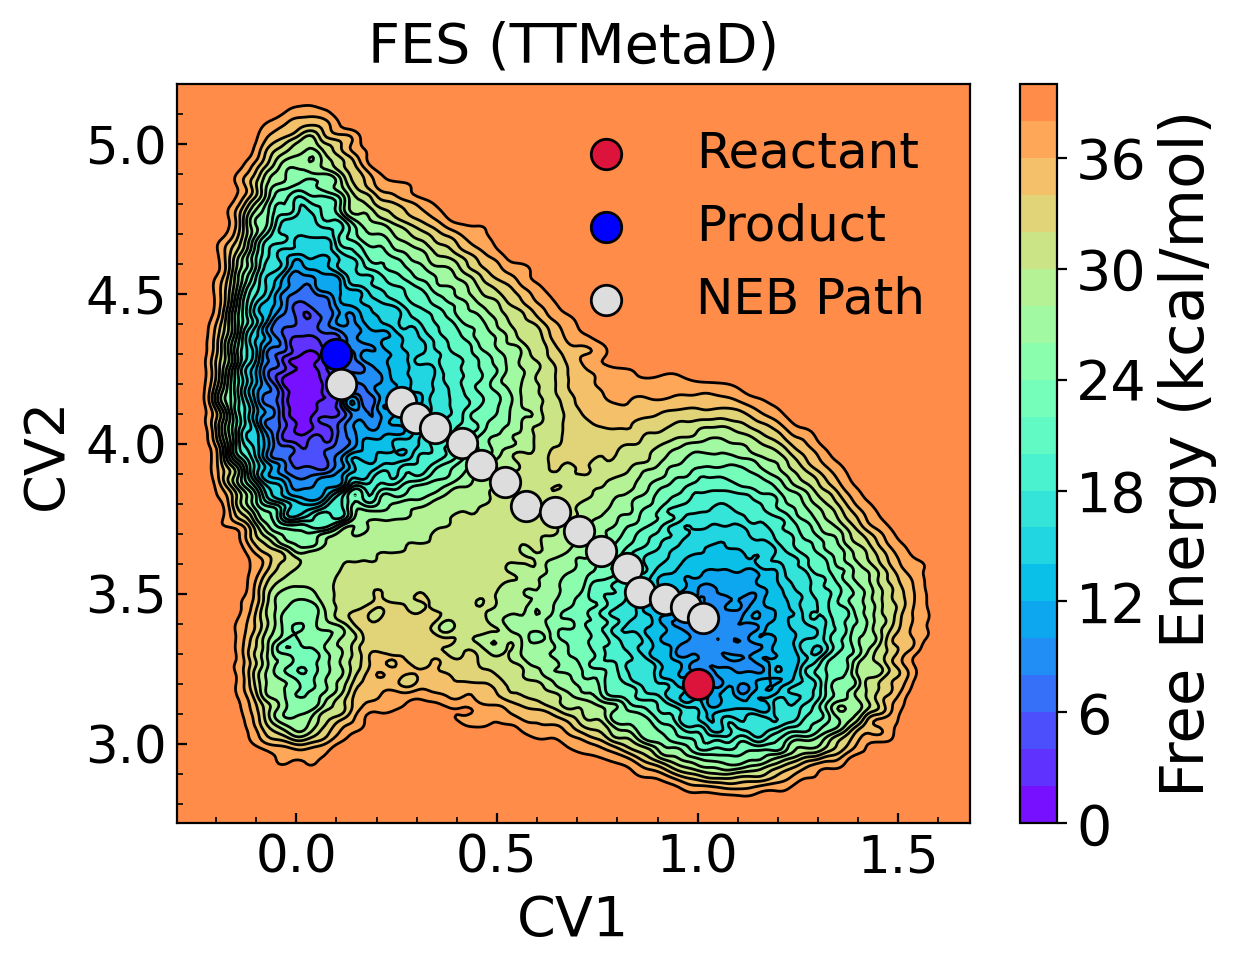

In [4]:
# Load the COLVAR file containing the cv1, cv2, and metadynamics bias data
data = np.loadtxt('fes.dat', comments=['#', '@'])

# find the maximum number of ascending data as the dimension of cv1
fontsize = 16
max_ascend = 0
for i in range(1, data.shape[0]):
    if data[i, 0] > data[i-1, 0]:
        max_ascend = i
    else:
        break
len_cv1 = max_ascend + 1
len_cv2 = data.shape[0]//len_cv1
print("cv1 dimension:", len_cv1)
print("cv2 dimension:", len_cv2)

level = 20
alg = "mpl2014"
linewidth, alpha = 2, 1
# Extract the cv1, cv2, and bias data from the columns of the data array
cv1 = data[:,0]
cv2 = data[:,1]
bias = data[:,2]
# Reshape the bias data into a 2D grid
bias_grid = np.reshape(bias, (len_cv2, len_cv1))
# Define the cv1 and cv2 bin edges for the histogram
cv1_bins = data[:len_cv1,0]
cv2_bins = data[::len_cv1,1]
# Create a contour plot of the bias grid
# Set the color of the largest region to white
plt.contour(cv1_bins[:], cv2_bins[:], bias_grid, levels=level, colors='black',
            antialiased=100, linewidths=1, linestyles="solid", algorithm=alg, zorder=1)
plt.contourf(cv1_bins[:], cv2_bins[:], bias_grid, levels=level, cmap='rainbow',
            antialiased=100, algorithm=alg, zorder=0, alpha=alpha,
            vmin=0, vmax=48, extend='neither')
# Add labels and a colorbar to the plot
plt.xlabel('CV1', fontsize=fontsize+4)
plt.ylabel('CV2', fontsize=fontsize+4)
plt.xticks(np.linspace(0,2,5), fontsize=fontsize+2.5)
plt.yticks(np.linspace(2.5,5.0,6), fontsize=fontsize+2.5)
plt.title(f'FES (TTMetaD)', fontsize=fontsize+4, pad=8)
# ticks direction in
plt.tick_params(direction='in')
# minor ticks on for both
plt.minorticks_on()
# minor ticks direction in
plt.tick_params(which='minor', direction='in')
# set colorbar ticks and labels
cbar = plt.colorbar()
cbar.set_label('Free Energy (kcal/mol)', fontsize=fontsize+6)
cbar.ax.tick_params(labelsize=fontsize+4)

# Add the positions of the transition states to the plot
# TRANSITIONWELL0=1.0, 3.2
# TRANSITIONWELL1=0.1, 4.3
plt.scatter(1.0, 3.2, s=120, color="crimson", edgecolors='black', label='Reactant')
plt.scatter(0.1, 4.3, s=120, color="blue", edgecolors='black', label='Product')

# add the NEB path to the figure as points
# use blue circle with black edge
plt.scatter(neb_path[:,0], neb_path[:,1], s=120, color='#DDD', edgecolors='black', zorder=2, label='NEB Path')

plt.legend(framealpha=0, fontsize=fontsize+2)
# Save the plot to a file
plt.savefig(f'fes.png', dpi=300, bbox_inches='tight')